In [18]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

import pandas_market_calendars as mcal


In [19]:
nyse_dates = mcal.get_calendar('NYSE')
nyse_dates = list(nyse_dates.valid_days(start_date='2022-01-01', end_date='2030-02-12'))
nyse_dates = [dt.date() for dt in nyse_dates]

nyse_dates

[datetime.date(2022, 1, 3),
 datetime.date(2022, 1, 4),
 datetime.date(2022, 1, 5),
 datetime.date(2022, 1, 6),
 datetime.date(2022, 1, 7),
 datetime.date(2022, 1, 10),
 datetime.date(2022, 1, 11),
 datetime.date(2022, 1, 12),
 datetime.date(2022, 1, 13),
 datetime.date(2022, 1, 14),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 1, 19),
 datetime.date(2022, 1, 20),
 datetime.date(2022, 1, 21),
 datetime.date(2022, 1, 24),
 datetime.date(2022, 1, 25),
 datetime.date(2022, 1, 26),
 datetime.date(2022, 1, 27),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 2, 3),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 22

In [20]:
def next_market_day(date):
    while date.date() not in nyse_dates:
        date += datetime.timedelta(days=1)
    return date

In [21]:
df = pd.read_excel("WIW Data.xlsx")
# df = df.iloc[:, :-3]


df


,Ticker (Equities/ETFs only),"Position (Long = 1, Short = -1)",Entry Date,Exit Date,"Negative Alumni Response (No response/not negative = 0, Negative = 1)"
0,SIX,-1,2022-11-06,2023-04-06,0
1,DISH,-1,2022-11-06,2023-11-06,0
2,PLNT,1,2022-11-08,2023-05-08,0
3,MMM,-1,2022-11-08,2023-01-08,0
4,NFLX,-1,2022-11-09,2023-05-09,1
...,...,...,...,...,...
190,TMUS,1,2023-11-09,2024-11-09,0
191,TSM,1,2023-11-09,2024-11-09,0
192,SBUX,-1,2023-11-11,2023-12-26,0
193,NOW,1,2023-11-13,2024-02-13,0


In [22]:
df.head()

,Ticker (Equities/ETFs only),"Position (Long = 1, Short = -1)",Entry Date,Exit Date,"Negative Alumni Response (No response/not negative = 0, Negative = 1)"
0,SIX,-1,2022-11-06,2023-04-06,0
1,DISH,-1,2022-11-06,2023-11-06,0
2,PLNT,1,2022-11-08,2023-05-08,0
3,MMM,-1,2022-11-08,2023-01-08,0
4,NFLX,-1,2022-11-09,2023-05-09,1


In [23]:
def update_exit_date(row):
    if row['Exit Date'] > datetime.datetime(2024, 2, 9) and (row['Exit Date'] - row['Entry Date']).days >= 180:
        return datetime.datetime(2024, 2, 9)
    else:
        return row['Exit Date']

df = df.dropna()
df = df[df['Exit Date'] <= datetime.datetime(2024, 6, 1)]
df['Exit Date'] = df.apply(update_exit_date, axis=1)

df = df[df['Exit Date'] <= datetime.datetime(2024, 2, 9)]


# Step 3: Convert the date column to datetime if it's not already
df["Entry Date"] = df["Entry Date"].apply(next_market_day)
df["Exit Date"] = df["Exit Date"].apply(next_market_day)

df = df[df['Exit Date'] > df['Entry Date']]

unique_symbols = df['Ticker (Equities/ETFs only)'].unique()
unique_symbols


array(['SIX', 'DISH', 'PLNT', 'MMM', 'NFLX', 'RKLB', 'FIVE', 'EL', 'ORLY',
       'RUN', 'VECO', 'UHS', 'V', 'RTX', 'MCD', 'NTDOY', 'GLBE', 'GOOG',
       'NUE', 'UBER', 'AAPL', 'TR', 'VFC', 'MSFT', 'SLDP', 'GOOGL',
       'SBUX', 'BTU', 'SPOT', 'NVDA', 'LVMUY', 'DDOG', 'PWR', 'ON',
       'PERI', 'CVS', 'BABA', 'IEUR', 'ADANIENT.NS', 'HD', 'ATZAF', 'VZ',
       'ASML', 'XLY', 'HSY', 'FSR', 'GIS', 'BROS', 'CSCO', 'ASRT', 'CIBR',
       'CRM', 'NUVA', 'CFLT', 'CIEN', 'TGLS', 'CRWD', 'BOOT', 'ELF',
       'MANU', 'LYV', 'MDB', 'NOMD', 'BIDU', 'INMD', 'OPRA', 'RACE',
       'RBLX', 'PANW', 'XFAB', 'VRRM', 'CPRI', 'RH', 'SI=F', 'ZTS',
       'FARO', 'DVN', 'MAR', 'CE', 'ONON', 'GOLF', 'EA', 'HCP', 'XOM',
       'CRK', 'FFZ3', 'FERG', 'CMBX', 'DME', 'DE', 'TSMC', 'WFC', 'LSPN',
       'ADSK', 'ICE:DXY', 'SHOP', 'MU', 'TPC', 'LUV', 'TSLA', 'WTI',
       'VLD', 'U', 'CC', 'AMZN', 'ETSY', 'CROX', 'ALGN', 'PLTR', 'NOC',
       'TSN', 'MRNA', 'HPE', 'SYM', 'ALB', 'UAA', 'BTC', 'PRM', 'WOLF',
   

In [24]:
stock_history = {}

start_date = '2022-01-01'
end_date = '2024-02-10'

for symbol in unique_symbols:
    print(symbol)
    stock = yf.download(symbol, start=start_date, end=end_date)

    if len(stock > 0):
        stock.index = stock.index.date
        stock_history[symbol] = stock


SIX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



DISH
[*********************100%%**********************]  1 of 1 completed
PLNT
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MMM
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



NFLX
[*********************100%%**********************]  1 of 1 completed
RKLB
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



FIVE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



EL
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ORLY
[*********************100%%**********************]  1 of 1 completed
RUN
[*********************100%%**********************]  1 of 1 completed
VECO
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



UHS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



V
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



RTX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MCD
[*********************100%%**********************]  1 of 1 completed
NTDOY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GLBE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GOOG
[*********************100%%**********************]  1 of 1 completed
NUE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



UBER
[*********************100%%**********************]  1 of 1 completed
AAPL


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



TR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



VFC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MSFT
[*********************100%%**********************]  1 of 1 completed
SLDP
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GOOGL
[*********************100%%**********************]  1 of 1 completed
SBUX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



BTU
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



SPOT
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



NVDA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



LVMUY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



DDOG
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



PWR
[*********************100%%**********************]  1 of 1 completed
ON
[*********************100%%**********************]  1 of 1 completed
PERI
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CVS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



BABA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



IEUR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ADANIENT.NS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



HD
[*********************100%%**********************]  1 of 1 completed
ATZAF
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



VZ
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ASML
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



XLY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



HSY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



FSR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GIS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



BROS
[*********************100%%**********************]  1 of 1 completed
CSCO
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ASRT
[*********************100%%**********************]  1 of 1 completed
CIBR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CRM
[*********************100%%**********************]  1 of 1 completed
NUVA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['NUVA']: Exception('%ticker%: No timezone found, symbol may be delisted')



CFLT


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CIEN
[*********************100%%**********************]  1 of 1 completed
TGLS


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CRWD
[*********************100%%**********************]  1 of 1 completed
BOOT
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ELF
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MANU
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



LYV
[*********************100%%**********************]  1 of 1 completed
MDB
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



NOMD
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



BIDU
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



INMD
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



OPRA
[*********************100%%**********************]  1 of 1 completed
RACE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



RBLX
[*********************100%%**********************]  1 of 1 completed
PANW
[*********************100%%**********************]  1 of 1 completed
XFAB
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['XFAB']: Exception('%ticker%: No timezone found, symbol may be delisted')



VRRM
[*********************100%%**********************]  1 of 1 completed
CPRI
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



RH
[*********************100%%**********************]  1 of 1 completed
SI=F
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ZTS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



FARO
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



DVN
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MAR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ONON
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GOLF
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



EA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



HCP
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



XOM
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CRK
[*********************100%%**********************]  1 of 1 completed
FFZ3
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['FFZ3']: Exception('%ticker%: No timezone found, symbol may be delisted')



FERG
[*********************100%%**********************]  1 of 1 completed
CMBX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['CMBX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-02-10)')



DME
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-02-10)')



DE
[*********************100%%**********************]  1 of 1 completed
TSMC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['TSMC']: Exception('%ticker%: No timezone found, symbol may be delisted')



WFC
[*********************100%%**********************]  1 of 1 completed
LSPN
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['LSPN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-02-10)')



ADSK
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ICE:DXY
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ICE:DXY']: Exception('%ticker%: No timezone found, symbol may be delisted')



SHOP
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MU
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



TPC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



LUV
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



TSLA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



WTI
[*********************100%%**********************]  1 of 1 completed
VLD
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



U
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



AMZN
[*********************100%%**********************]  1 of 1 completed
ETSY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CROX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ALGN
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



PLTR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



NOC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



TSN
[*********************100%%**********************]  1 of 1 completed
MRNA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



HPE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



SYM
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ALB
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



UAA
[*********************100%%**********************]  1 of 1 completed
BTC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



PRM
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



WOLF
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



COUR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GLD
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



SRS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



LMT
[*********************100%%**********************]  1 of 1 completed
SNY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



KR
[*********************100%%**********************]  1 of 1 completed


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [35]:
stock_history['AAPL']

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724564,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443558,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100
...,...,...,...,...,...,...
2024-02-05,188.149994,189.250000,185.839996,187.679993,187.440811,69668800
2024-02-06,186.860001,189.309998,186.770004,189.300003,189.058762,43490800
2024-02-07,190.639999,191.050003,188.610001,189.410004,189.168625,53439000
2024-02-08,189.389999,189.539993,187.350006,188.320007,188.080017,40962000


In [36]:
spy_data = pd.read_csv("SPY.csv")
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
spy_data['Date'] = spy_data['Date'].dt.date


type(spy_data['Date'][0])
# spy_data

datetime.date

In [37]:
df = df[df['Ticker (Equities/ETFs only)'].isin(stock_history.keys())]

entry_prices = []
exit_prices = []
spy_entry_prices = []
spy_exit_prices = []

for index, row in df.iterrows():
    ticker = row['Ticker (Equities/ETFs only)']
    entry_date = row['Entry Date'].date()
    exit_date = row['Exit Date'].date()

    ticker_history = stock_history[ticker]

    entry_prices.append(ticker_history.at[entry_date, 'Adj Close'])
    exit_prices.append(ticker_history.at[exit_date, 'Adj Close'])

    spy_entry_prices.append(spy_data.loc[spy_data['Date'] == entry_date]['Adj Close'].iloc[0])
    spy_exit_prices.append(spy_data.loc[spy_data['Date'] == exit_date]['Adj Close'].iloc[0])

df['entry_price'] = entry_prices
df['exit_price'] = exit_prices
df['spy_entry_price'] = spy_entry_prices
df['spy_exit_price'] = spy_exit_prices


In [38]:
df['pnl'] = (df['exit_price'] - df['entry_price']) * (100 / df['entry_price']) * (df['Position (Long = 1, Short = -1)'])
df['spy_pnl'] = (df['spy_exit_price'] - df['spy_entry_price']) * (100 / df['spy_entry_price']) * (df['Position (Long = 1, Short = -1)'])
df['duration'] = (df['Exit Date'] - df['Entry Date']).dt.days

df['annualized_pnl'] = df['pnl'] * (365/df['duration'])
df['annualized_spy_pnl'] = df['spy_pnl'] * (365/df['duration'])

In [39]:
print(df['annualized_pnl'].mean())
print(df['annualized_spy_pnl'].mean())

print(df['annualized_pnl'].median())
print(df['annualized_spy_pnl'].median())

9.78821329975052
9.632832773787516
8.078241797028735
22.585989659717292


In [40]:
len(df)

128

1304.3734378747988
1459.7730721238613
34.01475771517423
31.297060091401338
15.368391498947044
28.42910139907237


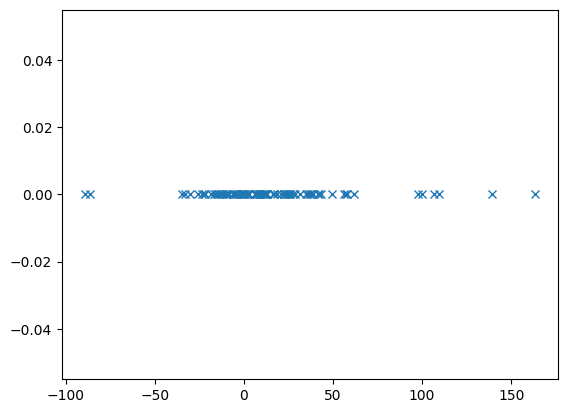

In [31]:
long_df = df[df['Position (Long = 1, Short = -1)'] == 1]
long_total_pnl = long_df['pnl'].sum()
print(long_total_pnl)
long_total_spy_pnl = long_df['spy_pnl'].sum()
print(long_total_spy_pnl)

print(long_df['annualized_pnl'].mean())
print(long_df['annualized_spy_pnl'].mean())

print(long_df['annualized_pnl'].median())
print(long_df['annualized_spy_pnl'].median())

plt.plot(list(long_df['pnl']), np.zeros_like(list(long_df['pnl'])), 'x') 

# type(long_df['pnl'])

-145.73583720263144
-395.7047273928675
-1706.3926188520907
-1489.8416329071138
-8.93045458811311
-29.379237243299045


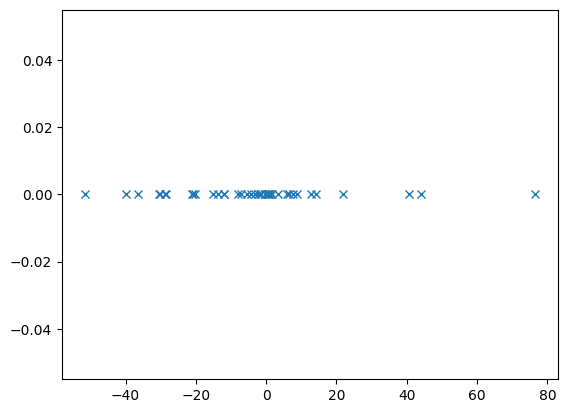

In [32]:
short_df = df[df['Position (Long = 1, Short = -1)'] == -1]
short_total_pnl = short_df['pnl'].sum()
print(short_total_pnl)
short_total_spy_pnl = short_df['spy_pnl'].sum()
print(short_total_spy_pnl)


print(short_df['annualized_pnl'].sum())
print(short_df['annualized_spy_pnl'].sum())

print(short_df['annualized_pnl'].median())
print(short_df['annualized_spy_pnl'].median())

plt.plot(list(short_df['pnl']), np.zeros_like(list(short_df['pnl'])), 'x') 

# type(long_df['pnl'])

In [33]:
len(short_df)

41

In [34]:
total_pnl = df['pnl'].sum()
print(total_pnl)
total_spy_pnl = df['spy_pnl'].sum()
print(total_spy_pnl)

1158.6376006721675
1064.0683447309939


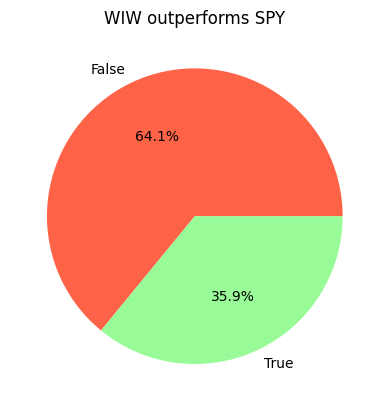

In [42]:
df['stock_growth'] = (df['Position (Long = 1, Short = -1)']) * ((df['exit_price'] - df['entry_price']) / df['entry_price']) * 100
df['spy_growth'] = ((df['spy_exit_price'] - df['spy_entry_price']) / df['spy_entry_price']) * 100
df['outperformed'] = df['stock_growth'] > df['spy_growth']

outperformed_counts = df['outperformed'].value_counts()

colors = ['tomato', 'palegreen']
labels = ['False', 'True']

plt.pie(outperformed_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('WIW outperforms SPY')

plt.show()


In [44]:
# nyse_dates = list(nyse_dates.valid_days(start_date='2022-01-01', end_date='2030-02-12'))
def count_trading_days(entry_date, exit_date):
    count = 0
    cur_date = entry_date
    while(cur_date <= exit_date):
        print('looping')
        if cur_date in nyse_dates:
            count += 1
        cur_date += datetime.timedelta(days=1)
    return count

def annualize(entry_date, exit_date, growth):
    days = count_trading_days(entry_date, exit_date)
    return (growth * 252 / days)

df['stock_annualized'] = df.apply(lambda row: annualize(row['Entry Date'], row['Exit Date'], row['stock_growth']), axis=1)
df

ZeroDivisionError: float division by zero